# Опорные объекты

Данное задание основано на материалах лекций по методам опорных векторов.

## Вы научитесь:

• работать с методом опорных векторов (SVM)

• находить наиболее важные объекты выборки

## Введение

Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки:

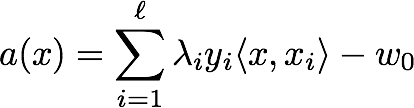

По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются опорными.

## Реализация в Scikit-learn

Загрузим выборку из приложенного файла svm-data.csv:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('svm-data.csv',names=['Target','Col1','Col2'])

В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем):

In [2]:
target = df['Target']
data = df.drop('Target',axis = 1)

Обучим классификатор с линейным ядром, параметром C = 100000 и random_state=241.

In [10]:
from sklearn.svm import SVC
clf = SVC(C=100000, random_state=241, kernel='linear')
clf.fit(data, target)

SVC(C=100000, kernel='linear', random_state=241)

Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

Найдём объекты которые являются опорными (нумерация с единицы):

In [20]:
objects = [str(i+1)for i in clf.support_]

print("Ответ: объекты", ', '.join(objects), "являются опорными.")

Ответ: объекты 4, 5, 10 являются опорными
